# Análisis de las canciones más escuchadas entre 2010 y 2019

Si no ve código debajo de esta línea, tiene una versión del análisis realizado en la que todo el código ha sido extraído para facilitar la lectura de personas no interesadas en él, sino en el análisis de los datos.

Para tener acceso al Git Hub con el código original, hacer clic en el <a href = "https://github.com/JoaquinMateosBarroso/Spotify-songs">enlace<a>.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

#### 1. Guía

1. [Primer vistazo a los datos](#primer_vistazo)


99. [Referencias](#referencias)

#### 2. Primer vistazo a los datos

Se adjunta en <a href = "about.pdf">este pdf</a> el significado de cada dimensión de los datos que tenemos, cuyo nombre ha sido abreviado en este análisis para compactar algunas tablas y gráficos

Veamos primero cuáles son los 10 álbumes más escuchados, y junto a ellos toda la información que tenemos de cada álbum, para hacernos una idea de los datos a analizar<br>

In [7]:
df = pd.read_csv("top10s.csv", encoding='latin')
df.pop("Unnamed: 0")
df = df.drop(df.loc[df["bpm"] == 0].index[0], axis = 0) #Un álbum con todo en 0 daba problemas
df.sort_values(by = "pop", ascending = False).head(10).style.hide(axis = "index")

title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92
South of the Border (feat. Camila Cabello & Cardi B),Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
Truth Hurts,Lizzo,escape room,2019,158,62,72,-3,12,41,173,11,11,90
Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90
Happier,Marshmello,brostep,2019,100,79,69,-3,17,67,214,19,5,90


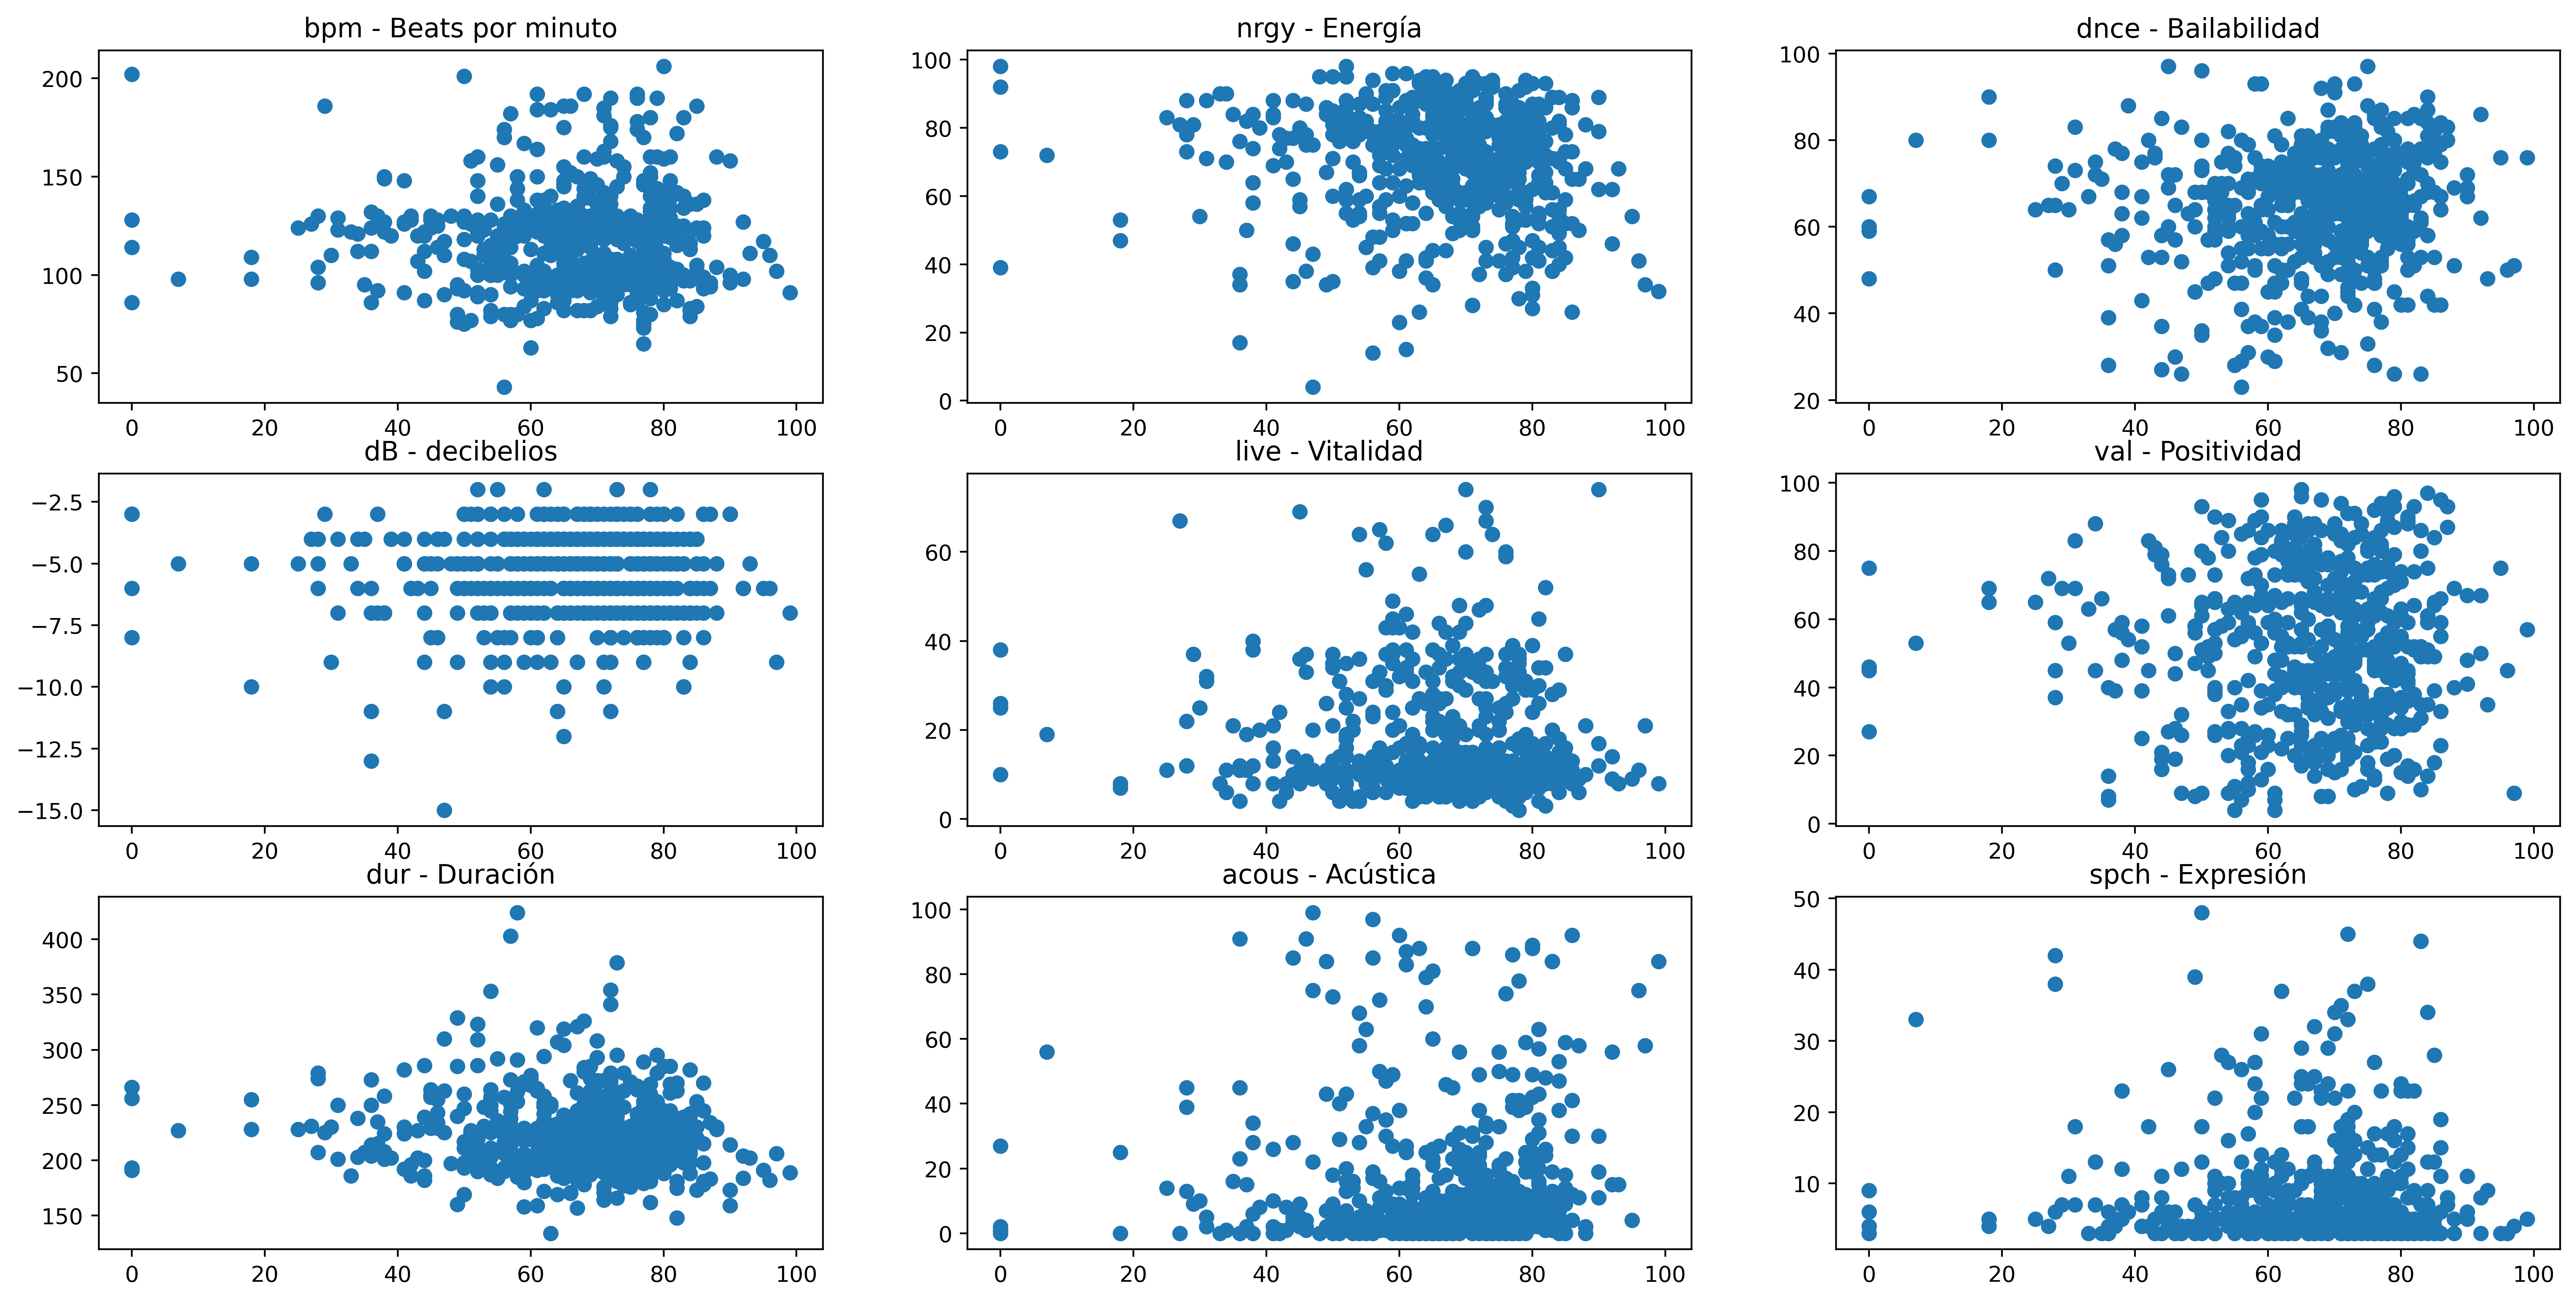

In [14]:
fig, axs = plt.subplots(3, 3)
fig.set_dpi(400)
fig.set_size_inches(20, 10)

axs[0][0].scatter(df["pop"], df["bpm"])
axs[0][0].set_title("bpm - Beats por minuto")
axs[0][1].scatter(df["pop"], df["nrgy"])
axs[0][1].set_title("nrgy - Energía")
axs[0][2].scatter(df["pop"], df["dnce"])
axs[0][2].set_title("dnce - Bailabilidad")
axs[1][0].scatter(df["pop"], df["dB"])
axs[1][0].set_title("dB - decibelios")
axs[1][1].scatter(df["pop"], df["live"])
axs[1][1].set_title("live - Vitalidad")
axs[1][2].scatter(df["pop"], df["val"])
axs[1][2].set_title("val - Positividad")
axs[2][0].scatter(df["pop"], df["dur"])
axs[2][0].set_title("dur - Duración")
axs[2][1].scatter(df["pop"], df["acous"])
axs[2][1].set_title("acous - Acústica")
axs[2][2].scatter(df["pop"], df["spch"])
axs[2][2].set_title("spch - Expresión")

plt.show()

#### 99. Referencias


<html><a id='referencias'></a></html>
El archivo usado para el análsis ha sido extraído de la plataforma de bases de datos kaggle, que es open source, por lo que tenemos todo el derecho a hacer lo que queramos con los datos.<br>
Adjunto link a la base de datos <a href="https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year/code" target="_blank">aquí</a>.